#모델 학습

In [370]:
import pandas as pd

df = pd.read_csv('/content/train_v5.csv', encoding='cp949')
df

,datetime,date,time,기온(°C),습도(%),month,경북_신규확진자수,구미 혁신도시배수지 유출유량 적산차,총인구수,세대수
0,2017-01-01 1:00,2017-01-01,1:00:00,-0.6,99.0,1,0,138.0,"16,738","6,215"
1,2017-01-01 2:00,2017-01-01,2:00:00,0.0,99.0,1,0,237.0,"16,738","6,215"
2,2017-01-01 3:00,2017-01-01,3:00:00,-0.5,98.0,1,0,128.0,"16,738","6,215"
3,2017-01-01 4:00,2017-01-01,4:00:00,-1.3,99.0,1,0,14.0,"16,738","6,215"
4,2017-01-01 5:00,2017-01-01,5:00:00,-2.2,99.0,1,0,11.0,"16,738","6,215"
...,...,...,...,...,...,...,...,...,...,...
35058,2020-12-31 19:00,2020-12-31,19:00:00,-2.4,55.0,12,23,328.0,"22,487","8,818"
35059,2020-12-31 20:00,2020-12-31,20:00:00,-3.2,61.0,12,23,347.0,"22,487","8,818"
35060,2020-12-31 21:00,2020-12-31,21:00:00,-3.7,67.0,12,23,335.0,"22,487","8,818"
35061,2020-12-31 22:00,2020-12-31,22:00:00,-4.0,68.0,12,23,141.0,"22,487","8,818"


In [371]:
df['총인구수'] = df['총인구수'].str.replace(',', '').astype(int)
df['세대수'] = df['세대수'].str.replace(',', '').astype(int)

In [372]:
df_label = pd.read_csv('/content/정답_label_v2.csv')
df_label

,datetime,구미 혁신도시배수지 유출유량 적산차,h0,h1,h2,h3,h4,h5,h6,h7,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,2017-01-01 01:00:00,138.0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,2017-01-01 02:00:00,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,2017-01-01 03:00:00,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,2017-01-01 04:00:00,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,2017-01-01 05:00:00,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,2020-12-17 19:00:00,322.0,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,2020-12-17 20:00:00,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,2020-12-17 21:00:00,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,2020-12-17 22:00:00,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [373]:
#추후 tess_v3와 결합해서 사용하기 위해 copy 진행
df_train = df.copy()
df_tr_label = df_label.copy()

In [374]:
df = df.head(34727)
df

,datetime,date,time,기온(°C),습도(%),month,경북_신규확진자수,구미 혁신도시배수지 유출유량 적산차,총인구수,세대수
0,2017-01-01 1:00,2017-01-01,1:00:00,-0.6,99.0,1,0,138.0,16738,6215
1,2017-01-01 2:00,2017-01-01,2:00:00,0.0,99.0,1,0,237.0,16738,6215
2,2017-01-01 3:00,2017-01-01,3:00:00,-0.5,98.0,1,0,128.0,16738,6215
3,2017-01-01 4:00,2017-01-01,4:00:00,-1.3,99.0,1,0,14.0,16738,6215
4,2017-01-01 5:00,2017-01-01,5:00:00,-2.2,99.0,1,0,11.0,16738,6215
...,...,...,...,...,...,...,...,...,...,...
34722,2020-12-17 19:00,2020-12-17,19:00:00,-1.7,36.0,12,9,322.0,22487,8818
34723,2020-12-17 20:00,2020-12-17,20:00:00,-2.7,44.0,12,9,286.0,22487,8818
34724,2020-12-17 21:00,2020-12-17,21:00:00,-3.8,50.0,12,9,377.0,22487,8818
34725,2020-12-17 22:00,2020-12-17,22:00:00,-4.2,58.0,12,9,426.0,22487,8818


In [375]:
df_label.drop(columns=['datetime','구미 혁신도시배수지 유출유량 적산차'], inplace=True)
df_label

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,141.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,178.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [376]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df

<ipython-input-376-e1a546b6025f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
<ipython-input-376-e1a546b6025f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['datetime'].dt.hour
<ipython-input-376-e1a546b6025f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,datetime,date,time,기온(°C),습도(%),month,경북_신규확진자수,구미 혁신도시배수지 유출유량 적산차,총인구수,세대수,hour,day
0,2017-01-01 01:00:00,2017-01-01,1:00:00,-0.6,99.0,1,0,138.0,16738,6215,1,1
1,2017-01-01 02:00:00,2017-01-01,2:00:00,0.0,99.0,1,0,237.0,16738,6215,2,1
2,2017-01-01 03:00:00,2017-01-01,3:00:00,-0.5,98.0,1,0,128.0,16738,6215,3,1
3,2017-01-01 04:00:00,2017-01-01,4:00:00,-1.3,99.0,1,0,14.0,16738,6215,4,1
4,2017-01-01 05:00:00,2017-01-01,5:00:00,-2.2,99.0,1,0,11.0,16738,6215,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34722,2020-12-17 19:00:00,2020-12-17,19:00:00,-1.7,36.0,12,9,322.0,22487,8818,19,17
34723,2020-12-17 20:00:00,2020-12-17,20:00:00,-2.7,44.0,12,9,286.0,22487,8818,20,17
34724,2020-12-17 21:00:00,2020-12-17,21:00:00,-3.8,50.0,12,9,377.0,22487,8818,21,17
34725,2020-12-17 22:00:00,2020-12-17,22:00:00,-4.2,58.0,12,9,426.0,22487,8818,22,17


In [377]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [378]:
import numpy as np

df['cos_24_1'] = np.cos(2 * np.pi * df['hour']/23.0)
fourier_features(df['hour'], 24, 1)

<ipython-input-378-3d799a1e4506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cos_24_1'] = np.cos(2 * np.pi * df['hour']/23.0)


,cos_24_1
hour,
1,1.000000
2,0.965926
3,0.866025
4,0.707107
5,0.500000
...,...
19,-0.000101
20,0.258644
21,0.500619


In [379]:
df = df[['month', '기온(°C)', '습도(%)',
       '경북_신규확진자수', '총인구수', '세대수', '구미 혁신도시배수지 유출유량 적산차', 'day',
       'cos_24_1']]

In [380]:
#결측치 처리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
df1 = pd.DataFrame(imputer.fit_transform(df))

df1.columns = df.columns
df1

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,1.0,-0.6,99.0,0.0,16738.0,6215.0,138.0,1.0,0.962917
1,1.0,0.0,99.0,0.0,16738.0,6215.0,237.0,1.0,0.854419
2,1.0,-0.5,98.0,0.0,16738.0,6215.0,128.0,1.0,0.682553
3,1.0,-1.3,99.0,0.0,16738.0,6215.0,14.0,1.0,0.460065
4,1.0,-2.2,99.0,0.0,16738.0,6215.0,11.0,1.0,0.203456
...,...,...,...,...,...,...,...,...,...
34722,12.0,-1.7,36.0,9.0,22487.0,8818.0,322.0,17.0,0.460065
34723,12.0,-2.7,44.0,9.0,22487.0,8818.0,286.0,17.0,0.682553
34724,12.0,-3.8,50.0,9.0,22487.0,8818.0,377.0,17.0,0.854419
34725,12.0,-4.2,58.0,9.0,22487.0,8818.0,426.0,17.0,0.962917


In [381]:
df1.isnull().sum()

month                  0
기온(°C)                 0
습도(%)                  0
경북_신규확진자수              0
총인구수                   0
세대수                    0
구미 혁신도시배수지 유출유량 적산차    0
day                    0
cos_24_1               0
dtype: int64

In [382]:
df1

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,1.0,-0.6,99.0,0.0,16738.0,6215.0,138.0,1.0,0.962917
1,1.0,0.0,99.0,0.0,16738.0,6215.0,237.0,1.0,0.854419
2,1.0,-0.5,98.0,0.0,16738.0,6215.0,128.0,1.0,0.682553
3,1.0,-1.3,99.0,0.0,16738.0,6215.0,14.0,1.0,0.460065
4,1.0,-2.2,99.0,0.0,16738.0,6215.0,11.0,1.0,0.203456
...,...,...,...,...,...,...,...,...,...
34722,12.0,-1.7,36.0,9.0,22487.0,8818.0,322.0,17.0,0.460065
34723,12.0,-2.7,44.0,9.0,22487.0,8818.0,286.0,17.0,0.682553
34724,12.0,-3.8,50.0,9.0,22487.0,8818.0,377.0,17.0,0.854419
34725,12.0,-4.2,58.0,9.0,22487.0,8818.0,426.0,17.0,0.962917


In [383]:
TEST_SIZE = 300
window_size = 50

train = df1[:-TEST_SIZE]
test = df1[-TEST_SIZE:]
train

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,1.0,-0.6,99.0,0.0,16738.0,6215.0,138.0,1.0,0.962917
1,1.0,0.0,99.0,0.0,16738.0,6215.0,237.0,1.0,0.854419
2,1.0,-0.5,98.0,0.0,16738.0,6215.0,128.0,1.0,0.682553
3,1.0,-1.3,99.0,0.0,16738.0,6215.0,14.0,1.0,0.460065
4,1.0,-2.2,99.0,0.0,16738.0,6215.0,11.0,1.0,0.203456
...,...,...,...,...,...,...,...,...,...
34422,12.0,-3.2,83.0,17.0,22487.0,8818.0,46.0,5.0,-0.334880
34423,12.0,-3.3,83.0,17.0,22487.0,8818.0,40.0,5.0,-0.576680
34424,12.0,-0.5,71.0,17.0,22487.0,8818.0,139.0,5.0,-0.775711
34425,12.0,1.9,62.0,17.0,22487.0,8818.0,386.0,5.0,-0.917211


In [384]:
label_train = df_label[:-TEST_SIZE]
label_test = df_label[-TEST_SIZE:]
label_train

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,237.0,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,...,450.0,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0
1,128.0,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,...,315.0,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0
2,14.0,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,...,276.0,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0
3,11.0,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,...,221.0,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0
4,10.0,11.0,187.0,392.0,114.0,243.0,203.0,250.0,181.0,141.0,...,56.0,203.0,257.0,164.0,114.0,35.0,32.0,29.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34422,40.0,139.0,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,...,366.0,109.0,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0
34423,139.0,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,...,109.0,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0
34424,386.0,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,377.0,...,190.0,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0,176.0
34425,547.0,366.0,432.0,219.0,190.0,139.0,244.0,388.0,377.0,360.0,...,161.0,141.0,122.0,73.0,43.0,47.0,51.0,55.0,176.0,320.0


In [385]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(train))
X.columns = train.columns

In [386]:
zero_padding1 = X.head(49)
for i in zero_padding1.columns :
  zero_padding1[i] = 0

X = pd.concat([zero_padding1, X], axis=0).reset_index().drop(columns='index')
X

<ipython-input-386-a9fe121b59e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding1[i] = 0


,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...
34471,1.0,0.216475,0.835052,0.139344,1.0,1.0,0.563492,0.133333,3.294374e-01
34472,1.0,0.214559,0.835052,0.139344,1.0,1.0,0.563491,0.133333,2.079713e-01
34473,1.0,0.268199,0.711340,0.139344,1.0,1.0,0.563500,0.133333,1.079902e-01
34474,1.0,0.314176,0.618557,0.139344,1.0,1.0,0.563523,0.133333,3.690921e-02


In [387]:
from sklearn.preprocessing import MinMaxScaler

scaler_label = MinMaxScaler()
train_label = pd.DataFrame(scaler_label.fit_transform(label_train))
train_label.columns = label_train.columns

In [388]:
zero_padding2 = train_label.head(49)
for i in zero_padding2.columns :
  zero_padding2[i] = 0

train_label = pd.concat([zero_padding2, train_label], axis=0).reset_index().drop(columns='index')
train_label

<ipython-input-388-c2192e0b8b1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding2[i] = 0


,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34471,0.056338,0.195775,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,...,0.515493,0.153521,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831
34472,0.195775,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,...,0.153521,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465
34473,0.543662,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,0.530986,...,0.267606,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465,0.247887
34474,0.770423,0.515493,0.608451,0.308451,0.267606,0.195775,0.343662,0.546479,0.530986,0.507042,...,0.226761,0.198592,0.171831,0.102817,0.060563,0.066197,0.071831,0.077465,0.247887,0.450704


In [389]:
import numpy as np

def make_dataset(data, label, window_size = 50) :
  feature_list = []
  label_list = []

  for i in range(len(data) - window_size + 1) :
    try:
      feature_list.append(np.array(data.iloc[i:i+window_size])) #train 셋에서 i번째 부터 I+20번째 행까지 추출해 하나의 배열에 담아 빈 리스트에 추가
      label_list.append(np.array(label.iloc[i+window_size-1]))
    except:
      print(f"Tried to index from {i} to {i+window_size} but failed")
      feature_list.append(np.array(data.iloc[i:i+window_size]))
      label_list.append(np.array(label.iloc[i+window_size]))
      raise NotImplementedError
  return np.array(feature_list), np.array(label_list)

In [390]:
#train_label.iloc[34426:34476]

In [391]:
from sklearn.model_selection import train_test_split

train_feature = X
train_label = train_label

train_feature, train_label = make_dataset(train_feature, train_label, window_size=50)

x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size = 0.3, random_state=3)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(24098, 50, 9) (10329, 50, 9)
(24098, 336) (10329, 336)


In [392]:
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [393]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]), #input_shape으로 train_feature에 1번 인덱스와 2번 인덱스 값을 가져와 (20,3) 행렬을 input으로 집어 넣겠다는 의미
               activation='relu',
               return_sequences = False)
          )
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(336))

In [394]:
import os
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) #LSTM에서는 옵티마이저를 adam을 많이 씀
early_stop = EarlyStopping(monitor='val_loss', patience=2) #patience 옵션 : 

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=500, 
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop, checkpoint])

Epoch 1/50
49/49 [==============================] - ETA: 0s - loss: 0.1038 - mae: 0.2548
Epoch 1: val_loss improved from inf to 0.05456, saving model to model/tmp_checkpoint.h5
49/49 [==============================] - 16s 273ms/step - loss: 0.1038 - mae: 0.2548 - val_loss: 0.0546 - val_mae: 0.1901
Epoch 2/50
49/49 [==============================] - ETA: 0s - loss: 0.0500 - mae: 0.1842
Epoch 2: val_loss improved from 0.05456 to 0.04872, saving model to model/tmp_checkpoint.h5
49/49 [==============================] - 13s 263ms/step - loss: 0.0500 - mae: 0.1842 - val_loss: 0.0487 - val_mae: 0.1823
Epoch 3/50
49/49 [==============================] - ETA: 0s - loss: 0.0485 - mae: 0.1822
Epoch 3: val_loss improved from 0.04872 to 0.04840, saving model to model/tmp_checkpoint.h5
49/49 [==============================] - 13s 277ms/step - loss: 0.0485 - mae: 0.1822 - val_loss: 0.0484 - val_mae: 0.1823
Epoch 4/50
49/49 [==============================] - ETA: 0s - loss: 0.0474 - mae: 0.1799
Epoch 

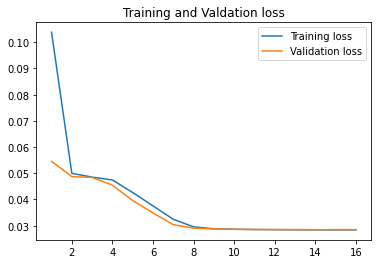

In [396]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show() 

In [397]:
#test 데이터 검정

In [398]:
test

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
34427,12.0,7.0,47.0,17.0,22487.0,8818.0,366.0,5.0,-0.990686
34428,12.0,8.1,44.0,17.0,22487.0,8818.0,432.0,5.0,-0.917211
34429,12.0,7.5,47.0,17.0,22487.0,8818.0,219.0,5.0,-0.775711
34430,12.0,8.1,47.0,17.0,22487.0,8818.0,190.0,5.0,-0.576680
34431,12.0,6.8,51.0,17.0,22487.0,8818.0,139.0,5.0,-0.334880
...,...,...,...,...,...,...,...,...,...
34722,12.0,-1.7,36.0,9.0,22487.0,8818.0,322.0,17.0,0.460065
34723,12.0,-2.7,44.0,9.0,22487.0,8818.0,286.0,17.0,0.682553
34724,12.0,-3.8,50.0,9.0,22487.0,8818.0,377.0,17.0,0.854419
34725,12.0,-4.2,58.0,9.0,22487.0,8818.0,426.0,17.0,0.962917


In [399]:
scaler_val = MinMaxScaler()
scaler1 = MinMaxScaler()
X_test = pd.DataFrame(scaler_val.fit_transform(test))
X_test.columns = test.columns
X_test

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,0.0,0.752577,0.407895,0.56,0.0,0.0,0.468057,0.0,0.000000
1,0.0,0.809278,0.368421,0.56,0.0,0.0,0.554107,0.0,0.036909
2,0.0,0.778351,0.407895,0.56,0.0,0.0,0.276402,0.0,0.107990
3,0.0,0.809278,0.407895,0.56,0.0,0.0,0.238592,0.0,0.207971
4,0.0,0.742268,0.460526,0.56,0.0,0.0,0.172099,0.0,0.329437
...,...,...,...,...,...,...,...,...,...
295,0.0,0.304124,0.263158,0.24,0.0,0.0,0.410691,1.0,0.728769
296,0.0,0.252577,0.368421,0.24,0.0,0.0,0.363755,1.0,0.840534
297,0.0,0.195876,0.447368,0.24,0.0,0.0,0.482399,1.0,0.926869
298,0.0,0.175258,0.552632,0.24,0.0,0.0,0.546284,1.0,0.981372


In [400]:
zero_padding3 = X_test.head(49)
for i in zero_padding3.columns :
  zero_padding3[i] = 0

X_test = pd.concat([zero_padding3, X_test], axis=0)
X_test

<ipython-input-400-cf6f850775a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding3[i] = 0


,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
295,0.0,0.304124,0.263158,0.24,0.0,0.0,0.410691,1.0,0.728769
296,0.0,0.252577,0.368421,0.24,0.0,0.0,0.363755,1.0,0.840534
297,0.0,0.195876,0.447368,0.24,0.0,0.0,0.482399,1.0,0.926869
298,0.0,0.175258,0.552632,0.24,0.0,0.0,0.546284,1.0,0.981372


In [401]:
test_label = pd.DataFrame(scaler1.fit_transform(label_test))
test_label.columns = label_test.columns

In [402]:
zero_padding4 = test_label.head(49)
for i in zero_padding4.columns :
  zero_padding4[i] = 0

test_label = pd.concat([zero_padding4, test_label], axis=0)
test_label

<ipython-input-402-479fe27de495>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_padding4[i] = 0


,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.404935,0.537010,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,...,0.563272,0.533951,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222
296,0.537010,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,...,0.533951,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543
297,0.608128,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,0.155298,...,0.233025,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543,0.483025
298,0.558781,0.267054,0.251089,0.203193,0.084180,0.071118,0.066763,0.040639,0.155298,0.248186,...,0.501543,0.483025,0.280864,0.358025,0.695988,0.436728,0.472222,0.501543,0.483025,0.183642


In [403]:
test_feature = X_test
test_label = test_label

In [404]:
test_feature, test_label = make_dataset(test_feature, test_label, window_size = 50)
test_feature.shape, test_label.shape

((300, 50, 9), (300, 336))

In [405]:
model.load_weights(filename)
pred = pd.DataFrame(model.predict(test_feature))

pred

10/10 [==============================] - 0s 11ms/step


,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.169587,0.165783,0.143856,0.119837,0.127981,0.090279,0.111549,0.130169,0.131996,0.175781,...,0.182716,0.180950,0.149754,0.143281,0.129318,0.132424,0.162947,0.193151,0.191885,0.194368
1,0.176813,0.172353,0.146165,0.124966,0.129378,0.091006,0.114686,0.135243,0.139918,0.185636,...,0.197667,0.193762,0.162698,0.153807,0.138463,0.143889,0.170350,0.204283,0.200945,0.202445
2,0.181062,0.176182,0.146760,0.128122,0.131456,0.095523,0.119365,0.141420,0.147307,0.192750,...,0.205366,0.199741,0.171452,0.163390,0.147341,0.155430,0.178051,0.212824,0.207613,0.207830
3,0.184480,0.181033,0.147078,0.132108,0.135015,0.101333,0.123867,0.147572,0.153755,0.198429,...,0.213989,0.205897,0.180943,0.175677,0.159524,0.167415,0.186397,0.219793,0.213254,0.213367
4,0.184956,0.183498,0.146545,0.135053,0.138802,0.108102,0.128282,0.153275,0.158877,0.202761,...,0.221039,0.211749,0.189830,0.187781,0.172190,0.177469,0.193675,0.223128,0.215576,0.215625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.267991,0.300733,0.291333,0.295164,0.269128,0.188463,0.141355,0.102701,0.070868,0.095665,...,0.309087,0.340834,0.326894,0.315413,0.273822,0.233013,0.226800,0.251536,0.250661,0.271981
296,0.289149,0.297829,0.274189,0.245856,0.207774,0.137603,0.103106,0.088806,0.081556,0.124792,...,0.326170,0.335698,0.304923,0.285111,0.253174,0.220874,0.237966,0.268132,0.277137,0.293431
297,0.302628,0.279397,0.236427,0.189529,0.152653,0.100729,0.082352,0.096780,0.115145,0.175688,...,0.308939,0.308521,0.271422,0.259180,0.245178,0.230330,0.266855,0.305058,0.312782,0.315906
298,0.294488,0.247771,0.191352,0.139891,0.111629,0.082494,0.085896,0.122723,0.159841,0.228748,...,0.295037,0.283689,0.249580,0.250425,0.251405,0.253602,0.292614,0.327872,0.330151,0.318226


In [406]:
pred_inv = pd.DataFrame(scaler1.inverse_transform(np.array(pred).reshape(300,336)))
pred_inv

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,123.845726,121.224289,106.116844,89.567635,95.178581,69.201981,83.856995,96.686218,97.945557,128.112991,...,140.399704,139.255493,119.040573,114.845978,105.797935,107.810883,127.589973,147.161880,146.341324,147.950226
1,128.824112,125.751137,107.707802,93.101768,96.141220,69.702942,86.018692,100.182747,103.403549,134.902985,...,150.087982,147.557648,127.428154,121.666748,111.724152,115.240189,132.386993,154.375183,152.212524,153.184540
2,131.751526,128.389114,108.117882,95.275978,97.573273,72.815559,89.242630,104.438370,108.494423,139.805008,...,155.077057,151.432358,133.100983,127.876572,117.476768,122.718666,137.376755,159.909683,156.533234,156.673584
3,134.106934,131.731461,108.337036,98.022141,100.025017,76.818405,92.344307,108.677101,112.936996,143.717529,...,160.665176,155.421097,139.251312,135.838562,125.371689,130.484818,142.785278,164.425980,160.188843,160.261612
4,134.434448,133.430222,107.969543,100.051537,102.634537,81.482048,95.386513,112.606743,116.465965,146.702087,...,165.233353,159.213104,145.010056,143.681931,133.578995,137.000076,147.501495,166.587067,161.693085,161.724823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,191.645676,214.204880,207.728134,210.368225,192.428940,136.851303,104.393806,77.760651,55.827805,72.912987,...,222.288544,242.860184,233.827057,226.387558,199.436539,172.992218,168.966217,184.995651,184.428070,198.243729
296,206.223709,212.204178,195.916290,176.395020,150.156555,101.808441,78.040108,68.187668,63.192123,92.981567,...,233.358246,239.532013,219.590302,206.751877,186.056976,165.126312,176.201645,195.749634,201.585037,212.143280
297,215.510880,199.504532,169.898407,137.585678,112.177597,76.402039,63.740730,73.681664,86.334579,128.048706,...,222.192245,221.921753,197.881516,189.948853,180.875671,171.254089,194.922272,219.677383,224.682465,226.707245
298,209.902237,177.713898,138.841583,103.384590,83.912064,63.838528,66.182281,91.556160,117.130722,164.607086,...,213.184067,205.830414,183.727722,184.275436,184.910294,186.333786,211.613602,234.461166,235.938095,228.210205


In [407]:
label_test

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h326,h327,h328,h329,h330,h331,h332,h333,h334,h335
34427,432.0,219.0,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,...,122.0,73.0,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0
34428,219.0,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,...,73.0,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0
34429,190.0,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,...,43.0,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0
34430,139.0,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,171.0,...,47.0,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0,324.0
34431,244.0,388.0,377.0,360.0,487.0,413.0,97.0,153.0,171.0,129.0,...,51.0,55.0,176.0,320.0,433.0,554.0,409.0,121.0,324.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34722,286.0,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,...,387.0,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0
34723,377.0,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,...,368.0,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0
34724,426.0,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,...,173.0,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0
34725,392.0,191.0,180.0,147.0,65.0,56.0,53.0,35.0,114.0,178.0,...,347.0,335.0,204.0,254.0,473.0,305.0,328.0,347.0,335.0,141.0


In [408]:
d = pd.DataFrame(test_label)

In [409]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(d, pred))

0.1564342788283921


In [410]:
print(mean_absolute_error(label_test, pred_inv))

106.10756969985509


#모델 테스트

In [411]:
import pandas as pd
df_test = pd.read_csv('/content/test_v3.csv', encoding='cp949')

In [412]:
df_test

,datetime,구미 혁신도시배수지 유출유량 적산차,date,time,기온(°C),습도(%),month,경북_신규확진자수,총인구수,세대수
0,2021-01-01 0:00,106,2021-01-01,0:00:00,-4.3,61.0,1,24,"22,509","8,841"
1,2021-01-01 1:00,184,2021-01-01,1:00:00,-4.8,64.0,1,24,"22,509","8,841"
2,2021-01-01 2:00,277,2021-01-01,2:00:00,-5.4,69.0,1,24,"22,509","8,841"
3,2021-01-01 3:00,197,2021-01-01,3:00:00,-4.4,68.0,1,24,"22,509","8,841"
4,2021-01-01 4:00,72,2021-01-01,4:00:00,-4.9,68.0,1,24,"22,509","8,841"
...,...,...,...,...,...,...,...,...,...,...
8419,2021-12-17 19:00,327,2021-12-17,19:00:00,-4.2,60.0,12,169,"22,894","9,044"
8420,2021-12-17 20:00,513,2021-12-17,20:00:00,-4.3,47.0,12,169,"22,894","9,044"
8421,2021-12-17 21:00,396,2021-12-17,21:00:00,-4.7,42.0,12,169,"22,894","9,044"
8422,2021-12-17 22:00,350,2021-12-17,22:00:00,-5.2,42.0,12,169,"22,894","9,044"


In [413]:
df_test['총인구수'] = df_test['총인구수'].str.replace(',', '').astype(int)
df_test['세대수'] = df_test['세대수'].str.replace(',', '').astype(int)
df_test

,datetime,구미 혁신도시배수지 유출유량 적산차,date,time,기온(°C),습도(%),month,경북_신규확진자수,총인구수,세대수
0,2021-01-01 0:00,106,2021-01-01,0:00:00,-4.3,61.0,1,24,22509,8841
1,2021-01-01 1:00,184,2021-01-01,1:00:00,-4.8,64.0,1,24,22509,8841
2,2021-01-01 2:00,277,2021-01-01,2:00:00,-5.4,69.0,1,24,22509,8841
3,2021-01-01 3:00,197,2021-01-01,3:00:00,-4.4,68.0,1,24,22509,8841
4,2021-01-01 4:00,72,2021-01-01,4:00:00,-4.9,68.0,1,24,22509,8841
...,...,...,...,...,...,...,...,...,...,...
8419,2021-12-17 19:00,327,2021-12-17,19:00:00,-4.2,60.0,12,169,22894,9044
8420,2021-12-17 20:00,513,2021-12-17,20:00:00,-4.3,47.0,12,169,22894,9044
8421,2021-12-17 21:00,396,2021-12-17,21:00:00,-4.7,42.0,12,169,22894,9044
8422,2021-12-17 22:00,350,2021-12-17,22:00:00,-5.2,42.0,12,169,22894,9044


In [414]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['hour'] = df_test['datetime'].dt.hour
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test

,datetime,구미 혁신도시배수지 유출유량 적산차,date,time,기온(°C),습도(%),month,경북_신규확진자수,총인구수,세대수,hour,day
0,2021-01-01 00:00:00,106,2021-01-01,0:00:00,-4.3,61.0,1,24,22509,8841,0,1
1,2021-01-01 01:00:00,184,2021-01-01,1:00:00,-4.8,64.0,1,24,22509,8841,1,1
2,2021-01-01 02:00:00,277,2021-01-01,2:00:00,-5.4,69.0,1,24,22509,8841,2,1
3,2021-01-01 03:00:00,197,2021-01-01,3:00:00,-4.4,68.0,1,24,22509,8841,3,1
4,2021-01-01 04:00:00,72,2021-01-01,4:00:00,-4.9,68.0,1,24,22509,8841,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2021-12-17 19:00:00,327,2021-12-17,19:00:00,-4.2,60.0,12,169,22894,9044,19,17
8420,2021-12-17 20:00:00,513,2021-12-17,20:00:00,-4.3,47.0,12,169,22894,9044,20,17
8421,2021-12-17 21:00:00,396,2021-12-17,21:00:00,-4.7,42.0,12,169,22894,9044,21,17
8422,2021-12-17 22:00:00,350,2021-12-17,22:00:00,-5.2,42.0,12,169,22894,9044,22,17


In [415]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [416]:
import numpy as np

df_test['cos_24_1'] = np.cos(2 * np.pi * df_test['hour']/23.0)
fourier_features(df_test['hour'], 24, 1)

,cos_24_1
hour,
0,1.000000
1,0.965926
2,0.866025
3,0.707107
4,0.500000
...,...
19,0.258882
20,0.499987
21,0.707212


In [417]:
test = df_test[['month', '기온(°C)', '습도(%)',
       '경북_신규확진자수', '총인구수', '세대수', '구미 혁신도시배수지 유출유량 적산차', 'day',
       'cos_24_1']]

In [418]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
test1 = pd.DataFrame(imputer.fit_transform(test))

test1.columns = test.columns
test1

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,1.0,-4.3,61.0,24.0,22509.0,8841.0,106.0,1.0,1.000000
1,1.0,-4.8,64.0,24.0,22509.0,8841.0,184.0,1.0,0.962917
2,1.0,-5.4,69.0,24.0,22509.0,8841.0,277.0,1.0,0.854419
3,1.0,-4.4,68.0,24.0,22509.0,8841.0,197.0,1.0,0.682553
4,1.0,-4.9,68.0,24.0,22509.0,8841.0,72.0,1.0,0.460065
...,...,...,...,...,...,...,...,...,...
8419,12.0,-4.2,60.0,169.0,22894.0,9044.0,327.0,17.0,0.460065
8420,12.0,-4.3,47.0,169.0,22894.0,9044.0,513.0,17.0,0.682553
8421,12.0,-4.7,42.0,169.0,22894.0,9044.0,396.0,17.0,0.854419
8422,12.0,-5.2,42.0,169.0,22894.0,9044.0,350.0,17.0,0.962917


In [419]:
test1.isnull().sum()

month                  0
기온(°C)                 0
습도(%)                  0
경북_신규확진자수              0
총인구수                   0
세대수                    0
구미 혁신도시배수지 유출유량 적산차    0
day                    0
cos_24_1               0
dtype: int64

In [420]:
from sklearn.preprocessing import MinMaxScaler

scaler_ts = MinMaxScaler()
test_x = pd.DataFrame(scaler_ts.fit_transform(test1))
test_x.columns = test1.columns

In [421]:
df_train = X.tail(49)
test_x = pd.concat([df_train, test_x], axis=0).reset_index().drop(columns='index')
test_x

,month,기온(°C),습도(%),경북_신규확진자수,총인구수,세대수,구미 혁신도시배수지 유출유량 적산차,day,cos_24_1
0,1.0,0.409962,0.257732,0.090164,1.000000,1.0,0.563520,0.066667,5.551115e-17
1,1.0,0.419540,0.257732,0.090164,1.000000,1.0,0.563511,0.066667,0.000000e+00
2,1.0,0.431034,0.278351,0.090164,1.000000,1.0,0.563529,0.066667,3.690921e-02
3,1.0,0.429119,0.278351,0.090164,1.000000,1.0,0.563517,0.066667,1.079902e-01
4,1.0,0.425287,0.288660,0.090164,1.000000,1.0,0.563503,0.066667,2.079713e-01
...,...,...,...,...,...,...,...,...,...
8468,1.0,0.194274,0.568182,0.811594,0.992268,1.0,0.242222,0.533333,7.287694e-01
8469,1.0,0.192229,0.420455,0.811594,0.992268,1.0,0.380000,0.533333,8.405339e-01
8470,1.0,0.184049,0.363636,0.811594,0.992268,1.0,0.293333,0.533333,9.268691e-01
8471,1.0,0.173824,0.363636,0.811594,0.992268,1.0,0.259259,0.533333,9.813719e-01


In [422]:
feature_list = []
for i in range(len(test_x) - 49) :
  #print(i)
  feature_list.append(np.array(test_x.iloc[i:i+window_size]))

feature_list = np.array(feature_list)
print(feature_list.shape)


(8424, 50, 9)


In [423]:
model.load_weights(filename)
pred = pd.DataFrame(model.predict(feature_list))

pred

264/264 [==============================] - 2s 9ms/step


,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.442353,0.388909,0.344476,0.334247,0.340583,0.399414,0.438465,0.489637,0.501987,0.505354,...,0.088195,0.017546,0.035276,0.108662,0.196573,0.302065,0.390575,0.444807,0.488090,0.470835
1,0.372493,0.326365,0.321607,0.347248,0.373827,0.422487,0.461770,0.466132,0.438902,0.399309,...,0.076840,0.067938,0.130900,0.223321,0.300588,0.389692,0.418832,0.439967,0.438237,0.394367
2,0.335081,0.301991,0.332473,0.381193,0.412857,0.435813,0.454207,0.413436,0.350166,0.278481,...,0.102548,0.150190,0.237038,0.323191,0.372234,0.433838,0.412334,0.418419,0.382484,0.330998
3,0.316075,0.305901,0.358370,0.413219,0.439097,0.422677,0.401442,0.325022,0.240454,0.167670,...,0.155887,0.244314,0.323167,0.387777,0.402072,0.419034,0.372959,0.370645,0.326366,0.290268
4,0.313974,0.334734,0.381481,0.432766,0.440360,0.381724,0.320062,0.223057,0.134990,0.083043,...,0.227696,0.317938,0.374294,0.417301,0.395597,0.374293,0.317220,0.314360,0.286828,0.282930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,0.339559,0.366962,0.341235,0.308197,0.280852,0.217858,0.176924,0.164748,0.153651,0.182863,...,0.397300,0.396791,0.371385,0.349212,0.302559,0.286851,0.304145,0.331284,0.339796,0.367987
8420,0.356217,0.347786,0.300527,0.240283,0.210931,0.163223,0.141163,0.159849,0.179149,0.228565,...,0.395445,0.380327,0.343812,0.327418,0.297873,0.296741,0.335674,0.369019,0.378272,0.393730
8421,0.343276,0.306759,0.232681,0.187627,0.168810,0.121316,0.132448,0.176987,0.218756,0.281102,...,0.365201,0.355585,0.318213,0.323688,0.317791,0.321438,0.364106,0.411576,0.400349,0.398208
8422,0.289416,0.244813,0.168135,0.139621,0.143958,0.125423,0.168687,0.232905,0.281056,0.339592,...,0.344032,0.333707,0.308412,0.338948,0.360193,0.357486,0.400786,0.420390,0.392485,0.366796


In [424]:
pred_inv = pd.DataFrame(scaler_label.inverse_transform(np.array(pred).reshape(8424,336)))
pred_inv

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,314.070770,276.125183,244.578262,237.315033,241.813889,283.584229,311.310333,347.642303,356.410706,358.801239,...,62.618416,12.457471,25.045694,77.150215,139.566956,214.465820,277.308594,315.812714,346.543976,334.293091
1,264.469879,231.719086,228.341095,246.545898,265.417511,299.965912,327.856750,330.953918,311.620483,283.509430,...,54.556252,48.236286,92.938736,158.557770,213.417145,276.681305,297.370972,312.376801,311.148499,280.000488
2,237.907471,214.413834,236.056030,270.647156,293.128143,309.426910,322.486877,293.539612,248.618134,197.721741,...,72.809364,106.634895,168.296844,229.465942,264.286499,308.025055,292.756866,297.077759,271.563385,235.008850
3,224.412933,217.189972,254.442719,293.385376,311.758575,300.100739,285.023651,230.765686,170.722000,119.045792,...,110.679787,173.462662,229.448380,275.321564,285.471283,297.514435,264.800903,263.157745,231.720200,206.090347
4,222.921448,237.661392,270.851746,307.263702,312.655792,271.023743,227.244339,158.370224,95.843246,58.960632,...,161.663879,225.736252,265.748718,296.283875,280.873627,265.748291,225.226440,223.195419,203.648102,200.880157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,241.086548,260.543335,242.276505,218.819946,199.404938,154.679352,125.616035,116.971283,109.092293,129.832840,...,282.082886,281.721680,263.683197,247.940857,214.817215,203.664154,215.942719,235.211456,241.254852,261.270508
8420,252.914383,246.927750,213.374390,170.600830,149.760880,115.888298,100.225441,113.492630,127.195816,162.281494,...,280.765961,270.032501,244.106430,232.466843,211.489655,210.686035,238.328232,262.003540,268.572937,279.548553
8421,243.725830,217.799011,165.203842,133.214951,119.855400,86.134300,94.037910,125.660606,155.316620,199.582077,...,259.292969,252.465286,225.931488,229.818588,225.631622,228.220901,258.514954,292.218933,284.248077,282.727692
8422,205.485626,173.817123,119.375610,99.131073,102.209915,89.050560,119.767654,165.362869,199.549713,241.110626,...,244.262802,236.931915,218.972610,240.653336,255.736847,253.815155,284.558289,298.476837,278.664490,260.425140


In [425]:
sample_ts = pd.concat([df_test['datetime'], pred_inv], axis=1)
sample_ts

,datetime,0,1,2,3,4,5,6,7,8,...,326,327,328,329,330,331,332,333,334,335
0,2021-01-01 00:00:00,314.070770,276.125183,244.578262,237.315033,241.813889,283.584229,311.310333,347.642303,356.410706,...,62.618416,12.457471,25.045694,77.150215,139.566956,214.465820,277.308594,315.812714,346.543976,334.293091
1,2021-01-01 01:00:00,264.469879,231.719086,228.341095,246.545898,265.417511,299.965912,327.856750,330.953918,311.620483,...,54.556252,48.236286,92.938736,158.557770,213.417145,276.681305,297.370972,312.376801,311.148499,280.000488
2,2021-01-01 02:00:00,237.907471,214.413834,236.056030,270.647156,293.128143,309.426910,322.486877,293.539612,248.618134,...,72.809364,106.634895,168.296844,229.465942,264.286499,308.025055,292.756866,297.077759,271.563385,235.008850
3,2021-01-01 03:00:00,224.412933,217.189972,254.442719,293.385376,311.758575,300.100739,285.023651,230.765686,170.722000,...,110.679787,173.462662,229.448380,275.321564,285.471283,297.514435,264.800903,263.157745,231.720200,206.090347
4,2021-01-01 04:00:00,222.921448,237.661392,270.851746,307.263702,312.655792,271.023743,227.244339,158.370224,95.843246,...,161.663879,225.736252,265.748718,296.283875,280.873627,265.748291,225.226440,223.195419,203.648102,200.880157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2021-12-17 19:00:00,241.086548,260.543335,242.276505,218.819946,199.404938,154.679352,125.616035,116.971283,109.092293,...,282.082886,281.721680,263.683197,247.940857,214.817215,203.664154,215.942719,235.211456,241.254852,261.270508
8420,2021-12-17 20:00:00,252.914383,246.927750,213.374390,170.600830,149.760880,115.888298,100.225441,113.492630,127.195816,...,280.765961,270.032501,244.106430,232.466843,211.489655,210.686035,238.328232,262.003540,268.572937,279.548553
8421,2021-12-17 21:00:00,243.725830,217.799011,165.203842,133.214951,119.855400,86.134300,94.037910,125.660606,155.316620,...,259.292969,252.465286,225.931488,229.818588,225.631622,228.220901,258.514954,292.218933,284.248077,282.727692
8422,2021-12-17 22:00:00,205.485626,173.817123,119.375610,99.131073,102.209915,89.050560,119.767654,165.362869,199.549713,...,244.262802,236.931915,218.972610,240.653336,255.736847,253.815155,284.558289,298.476837,278.664490,260.425140


In [427]:
sample_ts.to_csv('sample.csv', index=False)